# Effects of borrower's financial situation on APR.
## by Kaori Ishikawa

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loan that could be used to predict borrower's APR.
The main focus was on original loan amount, prosper rating, income range and employment status.

## Dataset Overview

This document explores a datasets containing approximately 114,000 loans data from Prosper, a peer-to-peer lending platform, with 81 features including loan amount, borrower rate, current loan status and so on. 65 features were removed from the analysis in order to focus on the main interest.

In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

# remove some features
keep_col = ['BorrowerAPR', 'ProsperRating (numeric)', 'CreditScoreRangeLower', 'IncomeRange', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 
            'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast12Months', 'BankcardUtilization', 'EmploymentStatus', 'IsBorrowerHomeowner', 
           'LoanStatus',  'LoanOriginalAmount', 'ListingCategory (numeric)']
df_loan = df_loan[keep_col]

In [4]:
# data wrangling

# treat 0 as N/A 
df_loan['CreditScoreRangeLower'] = df_loan['CreditScoreRangeLower'].replace(0, np.nan)

# clean employment status data
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace({'Full-time':'Employed', 'Part-time':'Employed'})
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace('Not available', np.NaN)

# clean income range data
df_loan['IncomeRange'] = df_loan['IncomeRange'].replace({'Not displayed':np.nan, 'Not employed':'$0'})



## Distribution of borrower's APR

Borrower's APR has distribution with the peaks at around 0.18 and 0.3. Also, there is a strange high peak at around 0.36 as well.  According to the [Prosper website](https://www.prosper.com/loans/rates-and-fees/?refac=CANMB&refmc=6YRANV&refd=prosperblog), APR is usually between 5.99% and 35.97%. This indicates that there are many borrowers with around the maximum APR.


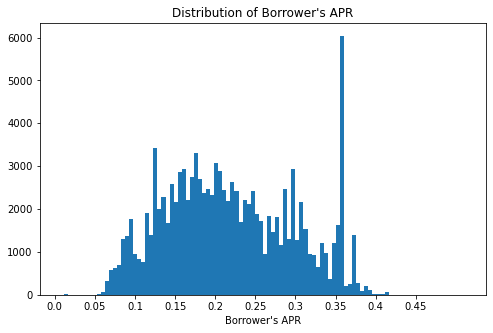

In [5]:
plt.figure(figsize = [8,5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = 100)
plt.title("Distribution of Borrower's APR")
plt.xticks([0.0,0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45], ['0.0', '0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45'])
plt.xlabel("Borrower's APR")
plt.show()

##  Distribution of Employment Status

Employed is the most frequent status by far followed by self-employed.

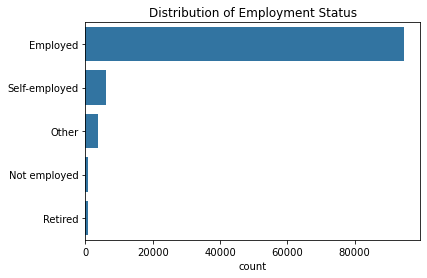

In [6]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_loan,  y = 'EmploymentStatus', color = base_color, order = df_loan['EmploymentStatus'].value_counts().index)
plt.title('Distribution of Employment Status')
plt.ylabel('');


## Distribution of Income range

Income range of "\\$25,000 - 49,999", and "\\$50,000 - 74,999" are the top 2. The income less than \\$24,999 are signifincantly less than the higher income range.

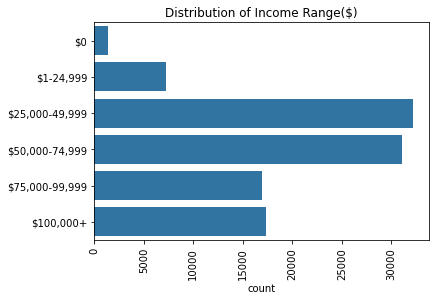

In [7]:
order_inc = ['$0', '$1-24,999', '$25,000-49,999','$50,000-74,999', '$75,000-99,999','$100,000+']
sb.countplot(data = df_loan, y = 'IncomeRange', color = base_color, order = order_inc)
plt.xticks(rotation = 90)
plt.title("Distribution of Income Range($)")
plt.ylabel("");

## Distribution of Original Loan Amount

The original amount tends to be nice round number and there are many small peaks.
Plotted on a logarithmic scale, the distribution of original loan amount takes on a multimodal shape.

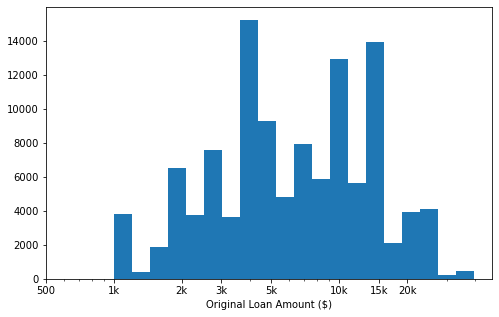

In [8]:
log_binsize = 0.08
bins = 10**np.arange(3, np.log10(df_loan.LoanOriginalAmount.max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 5e3, 1e4, 1.5e4, 2e4], [500, '1k', '2k','3k', '5k', '10k', '15k','20k'])
plt.xlabel('Original Loan Amount ($)')
plt.show()


# APR vs Income range
In general, as the income increase, APR goes lower.  
However, income range doesn't influence min. and max. of APR.

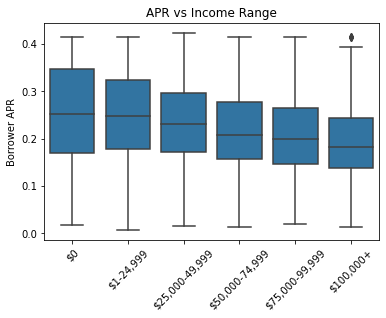

In [9]:
sb.boxplot(data = df_loan, x = 'IncomeRange', y = 'BorrowerAPR', order = order_inc, color = base_color)
plt.xticks(rotation = 45)
plt.title('APR vs Income Range')
plt.xlabel('')
plt.ylabel('Borrower APR');

# APR vs Employment status

In general, not-employed group has higher APR compared to the other groups.
Retired and others have slightly higher minimum APR.

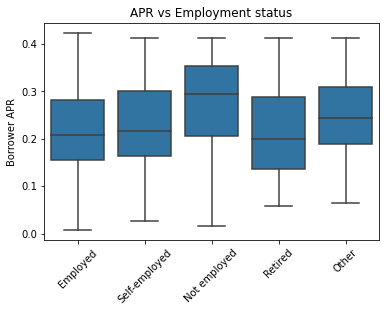

In [10]:
order_emp = ['Employed', 'Self-employed','Not employed', 'Retired', 'Other']
sb.boxplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', order = order_emp, color = base_color)
plt.xticks(rotation = 45)
plt.title('APR vs Employment status')
plt.xlabel('')
plt.ylabel('Borrower APR');

# APR vs Original Loan amount

APR and original loan amount shows negative relationship. With the peak around \\$4000 of loan amount and 0.37 of APR.

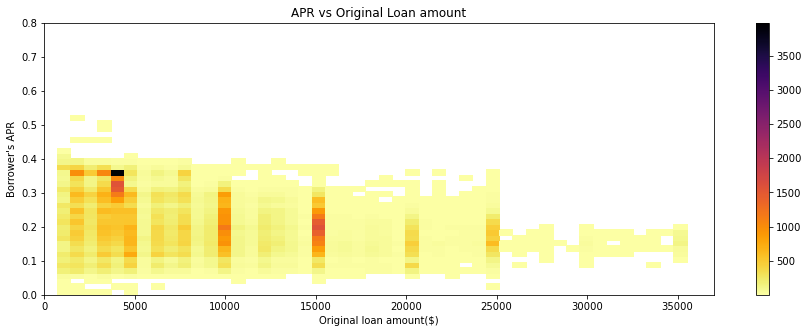

In [11]:
plt.figure(figsize=[15, 5])
plt.hist2d(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', range = [[0,37000], [0, 0.8]], 
           bins = 50, cmin = 0.5, cmap = 'inferno_r')

plt.colorbar()
plt.title('APR vs Original Loan amount')
plt.xlabel('Original loan amount($)')
plt.ylabel("Borrower's APR");

# APR vs Original loan amount by Employment status

Retired people seems to borrow a smaller amount of loan, while APR is still widely spread. On the other hands, Employed people's loan amount spread widely to both low and high amount. The cloud points don't move clearly between employment status, and employment status doesn't give a significant impact on APR compared to the original loan amount.

In [12]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    plt.hist2d(x, y, bins = 40, cmap = palette, cmin = 0.5)

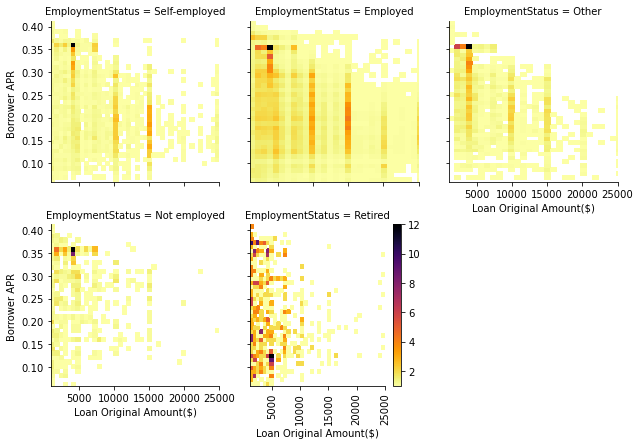

In [51]:
g = sb.FacetGrid(data = df_loan, col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan Original Amount($)')
g.set_ylabels('Borrower APR ')
plt.colorbar()
plt.xticks(rotation = 90)
plt.show()

# APR vs Original loan amount by Income range
As the income range increase, the higher loan amount increase. The cloud points of the vertical line don't significantly change between income range, while it gets shorter when the loan amount gets higher. Thus, the income range doesn't give significant impact compared to the loan amount.

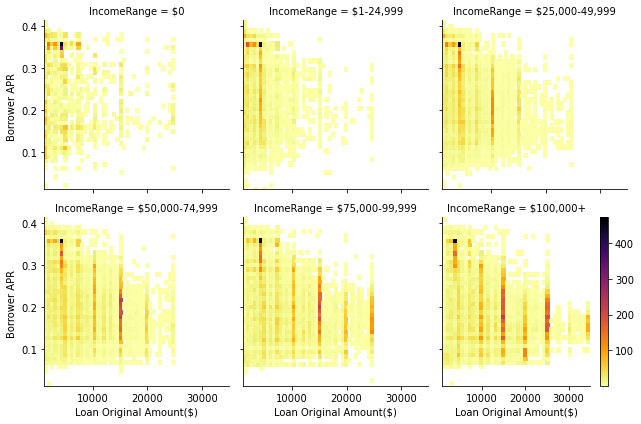

In [53]:

g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', col_order = order_inc, col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan Original Amount($)')

g.set_ylabels('Borrower APR ')
plt.colorbar()
plt.show()

# APR by Employment status and Income range for Selected original loan amount 

When you are employed, the influence of income to APR is clear throughout any level of the loan amount, although interestingly, income range of $0 has much lower APR. Other than the employed group, the influence on APR is not clear.

In [47]:
df_loan_org1 = df_loan[df_loan['LoanOriginalAmount'] < 4000]
df_loan_org2 = df_loan[(4000<= df_loan['LoanOriginalAmount']) & (df_loan['LoanOriginalAmount'] <6500)]
df_loan_org3 = df_loan[(6500<= df_loan['LoanOriginalAmount']) & (df_loan['LoanOriginalAmount'] <12000)]
df_loan_org4 = df_loan[1200<= df_loan['LoanOriginalAmount']]

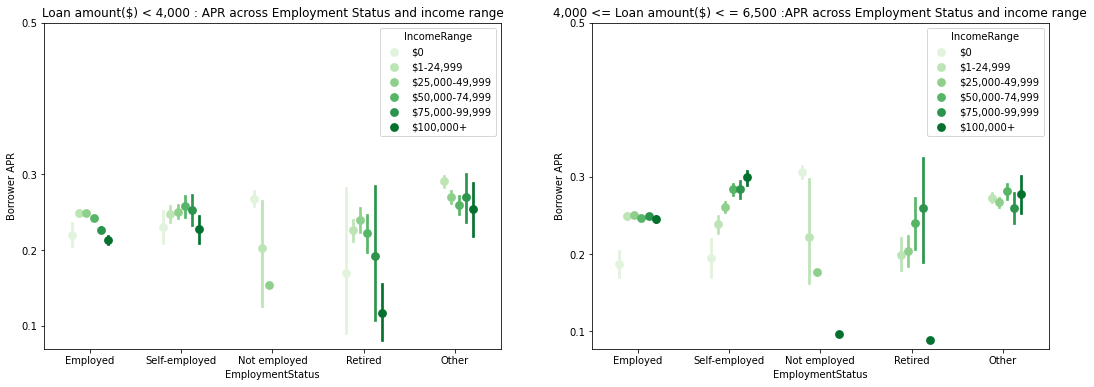

In [48]:
order_emp = ['Employed', 'Self-employed','Not employed', 'Retired', 'Other']
plt.figure(figsize = [18,6])

plt.subplot(1,2,1)
ax = sb.pointplot(data = df_loan_org1, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('Loan amount($) < 4,000 : APR across Employment Status and income range')
plt.ylabel('Borrower APR')
plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

plt.subplot(1,2,2)
ax = sb.pointplot(data = df_loan_org2, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('4,000 <= Loan amount($) < = 6,500 :APR across Employment Status and income range')
plt.ylabel('Borrower APR')
plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True);

# APR by Employment status and Income range for Selected original loan amount 

When you are employed, the influence of income to APR is clear throughout any level of the loan amount, although interestingly, income range of $0 has much lower APR. Other than the employed group, the influence on APR is not clear.

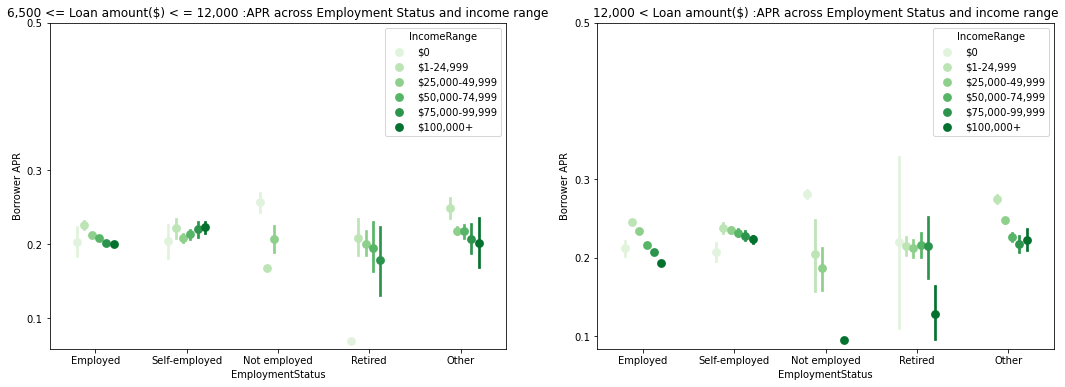

In [49]:
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
ax = sb.pointplot(data = df_loan_org3, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('6,500 <= Loan amount($) < = 12,000 :APR across Employment Status and income range')
plt.ylabel('Borrower APR')
plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

plt.subplot(1,2,2)
ax = sb.pointplot(data = df_loan_org4, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('12,000 < Loan amount($) :APR across Employment Status and income range')
plt.ylabel('Borrower APR')
plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True);